# Sudoku Dataset Generation

This notebook demonstrates how to generate custom Sudoku puzzle datasets for training and testing.

In [2]:
# Import necessary packages
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import Image

# Add the src directory to the path so we can import our modules
sys.path.append('..')

# Import our modules
from src.generator import (
    SudokuGeneratorConfig, 
    SudokuPuzzleGenerator, 
    SudokuImageGenerator, 
    SudokuDatasetGenerator,
    generate_sample_dataset
)
from src.utils import setup_project_paths, plot_grid

/Users/matt/development/sudoku-ai/sudoku-env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# Setup paths
paths = setup_project_paths()
print("Project paths:")
for key, path in paths.items():
    print(f"- {key}: {path}")

Project paths:
- project_root: /Users/matt/development/sudoku-ai
- data_dir: /Users/matt/development/sudoku-ai/data
- models_dir: /Users/matt/development/sudoku-ai/models
- notebooks_dir: /Users/matt/development/sudoku-ai/notebooks


## Quick Dataset Generation

First, let's try the quick function to generate a small sample dataset.

Generating 10 Sudoku puzzle samples...


100%|██████████| 10/10 [00:02<00:00,  3.42it/s]


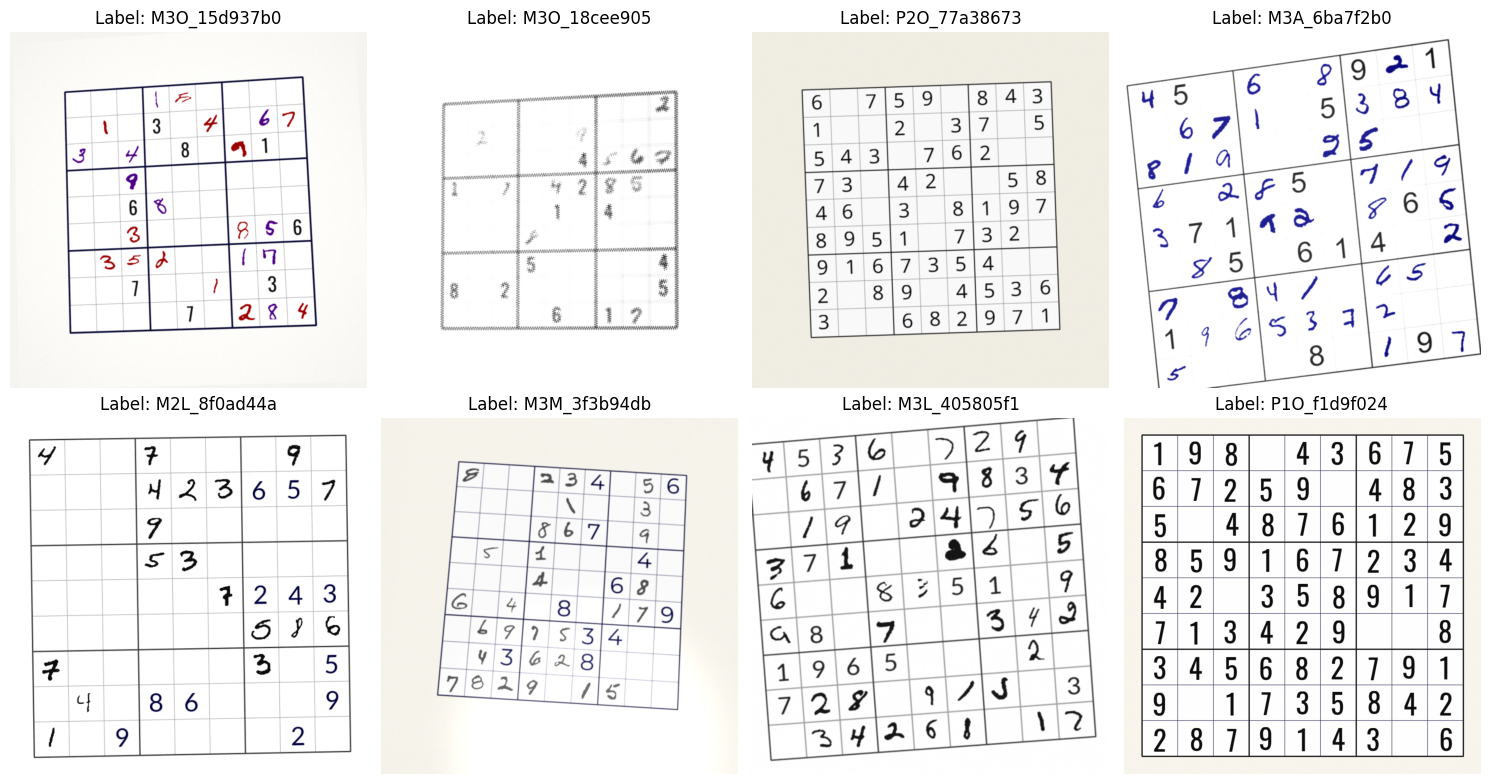


Generated Samples:
1. Label: M3O_15d937b0 - Mode: mixed, Difficulty: hard
2. Label: M3O_18cee905 - Mode: mixed, Difficulty: hard
3. Label: P2O_77a38673 - Mode: printed, Difficulty: medium
4. Label: M3A_6ba7f2b0 - Mode: mixed, Difficulty: hard
5. Label: M2L_8f0ad44a - Mode: mixed, Difficulty: medium
6. Label: M3M_3f3b94db - Mode: mixed, Difficulty: hard
7. Label: M3L_405805f1 - Mode: mixed, Difficulty: hard
8. Label: P1O_f1d9f024 - Mode: printed, Difficulty: easy
9. Label: P1M_acd0034b - Mode: printed, Difficulty: easy
10. Label: P1A_ec399f22 - Mode: printed, Difficulty: easy

Dataset generated successfully!
- 10 samples created
- Dataset saved at: /Users/matt/development/sudoku-ai/data/quick_sample_dataset


In [5]:
# Generate a small sample dataset
output_dir = os.path.join(paths['data_dir'], 'quick_sample_dataset')
generator, samples = generate_sample_dataset(
    num_samples=10,
    output_dir=output_dir,
    display_samples=8
)

## Custom Dataset Generation

Now let's create a more customized dataset with specific parameters.

In [ ]:
# Create a custom configuration
config = SudokuGeneratorConfig(
    # Main configuration values
    cell_size=80,
    grid_padding=40,
    background_padding=120,
    mask_rates=[0.3, 0.5],  # Only use these mask rates (fewer empty cells)
    
    # Digit rendering configuration
    digit_config={
        "vertical_alignment_offset": 5,  # Fix for vertical alignment
        "text_position_jitter": (-1, 1)  # Less jitter for more consistent positioning
    }
)

In [ ]:
# Create dataset generator with custom config
output_dir = os.path.join(paths['data_dir'], 'custom_dataset')
image_generator = SudokuImageGenerator(config)
dataset_generator = SudokuDatasetGenerator(image_generator, config, output_dir)

### Generate a Single Puzzle

Let's first generate a single puzzle to verify our configuration.

In [ ]:
# Generate a puzzle with the PuzzleGenerator
puzzle_generator = SudokuPuzzleGenerator(config)
grid, solution = puzzle_generator.generate(mask_rate=0.5)

# Display the grid
print("Generated Sudoku puzzle:")
plot_grid(grid, title="Sudoku Puzzle")

# Display the solution
print("\nSolution:")
plot_grid(solution, title="Sudoku Solution")

In [ ]:
# Generate a single image with our custom configuration
image, info = image_generator.generate_image(
    grid=grid,
    mode="mixed",  # mixed mode: some printed, some handwritten
    difficulty="medium",
    background_style="paper_color"
)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.title("Generated Sudoku Image (Mixed Mode)")
plt.axis('off')
plt.show()

# Print the generation info
print("Generation info:")
for key, value in info.items():
    if key == 'handwritten_positions':
        print(f"- {key}: {len(value)} positions")
    else:
        print(f"- {key}: {value}")

### Generate a Dataset

Now let's generate a complete dataset with various combinations of parameters.

In [ ]:
# Generate a dataset with custom parameters
samples = dataset_generator.generate_dataset(
    num_samples=20,
    modes=["printed", "mixed"],  # Only use printed and mixed modes
    difficulties=["easy", "medium"],  # Only use easy and medium difficulties
    background_styles=["paper_color", "unified"],  # Only use these background styles
    mask_rates=[0.3, 0.5],  # Only use these mask rates
    save_images=True,
    save_labels=True,
    display_samples=8,  # Display 8 samples from the generated dataset
    seed=42  # Set a random seed for reproducibility
)

### Export the Dataset

Let's export our dataset as a zip archive so it can be easily shared or used for training.

In [ ]:
# Export the dataset as a zip archive
archive_path = dataset_generator.export_as_archive()
print(f"Dataset archived at: {archive_path}")

## Generate a Larger Dataset for Training

For model training, we often need larger datasets with more variability.

In [ ]:
# Create a configuration for training data
training_config = SudokuGeneratorConfig(
    # Use default values for most parameters
    digit_config={
        "vertical_alignment_offset": 5  # Fix for vertical alignment
    }
)

In [ ]:
# Create dataset generator for training data
training_output_dir = os.path.join(paths['data_dir'], 'training_dataset')
training_image_generator = SudokuImageGenerator(training_config)
training_dataset_generator = SudokuDatasetGenerator(training_image_generator, training_config, training_output_dir)

In [ ]:
# Uncomment to generate a larger dataset for training
# Note: This will take a while to run!

# training_samples = training_dataset_generator.generate_dataset(
#     num_samples=300,  # 300 samples is a good starting point
#     modes=["printed", "mixed", "handwritten"],  # Use all modes
#     difficulties=["easy", "medium", "hard"],  # Use all difficulties
#     background_styles=["none", "paper_color", "unified"],  # Multiple background styles
#     save_images=True,
#     save_labels=True,
#     display_samples=5,  # Just show a few samples
#     seed=42
# )
# 
# # Export as a zip archive
# training_archive_path = training_dataset_generator.export_as_archive()
# print(f"Training dataset archived at: {training_archive_path}")

## Custom Test Image Generation

Sometimes you might want to generate specific test images with known parameters.

In [ ]:
# Generate a predetermined puzzle (less randomness)
# First, create a specific grid and solution

# Create a puzzle with 50% of cells empty
test_grid, test_solution = puzzle_generator.generate(mask_rate=0.5)

# Create a set of handwritten positions (for mixed mode)
non_empty_positions = [(i, j) for i in range(9) for j in range(9) if test_grid[i, j] != 0]
handwritten_count = len(non_empty_positions) // 2  # Make half of the filled cells handwritten
handwritten_positions = set(random.sample(non_empty_positions, handwritten_count))

# Generate the image with specific parameters
test_image, test_info = image_generator.generate_image(
    grid=test_grid,
    mode="mixed",
    difficulty="medium",
    background_style="unified",
    handwritten_positions=handwritten_positions
)

# Display the test image
plt.figure(figsize=(12, 12))
plt.imshow(test_image)
plt.title("Custom Test Image")
plt.axis('off')
plt.show()

# Save the test image for later use
test_image_path = os.path.join(paths['data_dir'], 'custom_test_image.png')
Image.fromarray(test_image).save(test_image_path)
print(f"Test image saved to: {test_image_path}")

## Visualizing Handwritten Positions

Let's visualize the handwritten positions on the grid to better understand the mixed mode.

In [ ]:
# Create a mask image showing handwritten positions
handwritten_mask = np.zeros((9, 9))
for pos in handwritten_positions:
    handwritten_mask[pos[0], pos[1]] = 1

# Create a figure with the grid and the handwritten mask
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Draw the grid
ax1.imshow(np.ones((9, 9)), cmap='Greys', alpha=0.5)
for i in range(10):
    lw = 2 if i % 3 == 0 else 0.5
    ax1.axhline(y=i, color='black', linewidth=lw)
    ax1.axvline(x=i, color='black', linewidth=lw)

# Add numbers to the grid
for i in range(9):
    for j in range(9):
        if test_grid[i, j] != 0:
            # Color differently based on whether it's handwritten or printed
            color = 'blue' if (i, j) in handwritten_positions else 'black'
            ax1.text(j + 0.5, i + 0.5, str(test_grid[i, j]),
                   ha='center', va='center',
                   color=color,
                   fontsize=12,
                   fontweight='bold')

ax1.set_title("Grid with Handwritten Digits in Blue")
ax1.axis('off')

# Draw the handwritten mask
ax2.imshow(handwritten_mask, cmap='Blues')
ax2.set_title("Handwritten Positions (Blue)")
for i in range(9):
    for j in range(9):
        ax2.text(j, i, '1' if handwritten_mask[i, j] == 1 else '0',
                ha='center', va='center',
                color='white' if handwritten_mask[i, j] == 1 else 'black',
                fontsize=8)
ax2.set_xticks(np.arange(9))
ax2.set_yticks(np.arange(9))
ax2.set_xticklabels(np.arange(9))
ax2.set_yticklabels(np.arange(9))
ax2.grid(True, color='gray', linestyle='-', linewidth=0.5)

plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we've demonstrated how to:
1. Generate individual Sudoku puzzles
2. Create Sudoku puzzle images with various styles
3. Generate complete datasets for training and testing
4. Export datasets as zip archives
5. Create custom test images with specific parameters

These capabilities are essential for training and evaluating Sudoku recognition systems, allowing you to generate synthetic training data with full control over the puzzle properties.